<a href="https://colab.research.google.com/github/tjrudrnr2/A.I/blob/main/notebook/4w_hw4_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/lstm.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/lstm.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Classification with LSTM

이번 과제에서는 LSTM(Long short-term memory) 을 사용해서 MNIST classification을 구현합니다. 밑바닥부터 구현하는 것은 아니고 "FILL IN HERE" 부분을 채우면 됩니다. 지워진 부분을 찾아서 코드를 작성한 후 실행해보세요.

In [ ]:
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████▌                  | 834.1 MB 1.4 MB/s eta 0:13:40tcmalloc: large alloc 1147494400 bytes == 0x563a3835a000 @  0x7f1ccdace615 0x5639ff5943bc 0x5639ff67518a 0x5639ff5971cd 0x5639ff689b3d 0x5639ff60b458 0x5639ff60602f 0x5639ff598aba 0x5639ff60b2c0 0x5639ff60602f 0x5639ff598aba 0x5639ff607cd4 0x5639ff68a986 0x5639ff607350 0x5639ff68a986 0x5639ff607350 0x5639ff68a986 0x5639ff607350 0x5639ff598f19 0x5639ff5dca79 0x5639ff597b32 0x5639ff60b1dd 0x5639ff60602f 0x5639ff598aba 0x5639ff607cd4 0x5639ff60602f 0x5639ff598aba 0x5639ff606eae 0x5639ff5989da 0x5639ff607108 0x5639ff60602f
     |█████████████████               | 1055.7 MB 1.6 MB/s eta 0:09:37tcmalloc: large alloc 1434370048 bytes == 0x563a7c9b0000 @  0x7f1ccdace615 0x5639ff5943bc 0x5639ff67518a 0x5639ff5971cd 0x5639ff689b3d 0x5639ff60b458 0x5639ff60602f 0x5639ff598aba 0x5639ff60b2c0 0x5639ff60602f 0x5639ff598aba 0x5639ff607cd4 0x5639ff68a986 0x5639ff6073

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina'
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version:[1.10.0+cu111].
device:[cuda:0].


### Dataset and Loader

Dataset은 [기본 과제] MLP Assignment에서 사용했던 MNIST입니다.

In [ ]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("Done.")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Done.


### Define Model

In [ ]:
class RecurrentNeuralNetworkClass(nn.Module):
    def __init__(self,name='rnn',xdim=28,hdim=256,ydim=10,n_layer=3):
        super(RecurrentNeuralNetworkClass,self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        self.n_layer = n_layer # K

        self.rnn = nn.LSTM(
            input_size=self.xdim,hidden_size=self.hdim,num_layers=self.n_layer,batch_first=True)
        self.lin = nn.Linear(self.hdim,self.ydim)

    def forward(self,x):
        # Set initial hidden and cell states 
        h0 = torch.zeros(
            # FILL IN HERE
            self.n_layer,x.size(0),self.hdim
        ).to(device)
        c0 = torch.zeros(
            # FILL IN HERE
            self.n_layer,x.size(0),self.hdim
        ).to(device)
        # RNN
        rnn_out,(hn,cn) = self.rnn(x, (h0,c0)) 
        # x:[N x L x Q] => rnn_out:[N x L x D]
        # Linear
        out = self.lin(
            # FILL IN HERE
            rnn_out[:,-1 :]
            ).view([-1,self.ydim]) 
        return out 

R = RecurrentNeuralNetworkClass(
    name='rnn',xdim=28,hdim=256,ydim=10,n_layer=2).to(device)
loss = nn.CrossEntropyLoss()
optm = optim.Adam(R.parameters(),lr=1e-3)
print ("Done.")

Done.


### Check How LSTM Works
- `N`: number of batches
- `L`: sequence lengh
- `Q`: input dim
- `K`: number of layers
- `D`: LSTM feature dimension

` Y,(hn,cn) = LSTM(X) `

- `X`: [N x L x Q] - `N` input sequnce of length `L` with `Q` dim. 
- `Y`: [N x L x D] - `N` output sequnce of length `L` with `D` feature dim.
- `hn`: [K x N x D] - `K` (per each layer) of `N` final hidden state with  `D` feature dim. 
- `cn`: [K x N x D] - `K` (per each layer) of `N` final hidden state with  `D` cell dim. 

In [ ]:
np.set_printoptions(precision=3)
torch.set_printoptions(precision=3)
x_numpy = np.random.rand(2,20,28) # [N x L x Q]
x_torch = torch.from_numpy(x_numpy).float().to(device)
rnn_out,(hn,cn) = R.rnn(x_torch) # forward path

print ("rnn_out:",rnn_out.shape) # [N x L x D]
print ("Hidden State hn:",hn.shape) # [K x N x D]
print ("Cell States cn:",cn.shape) # [K x N x D]

rnn_out: torch.Size([2, 20, 256])
Hidden State hn: torch.Size([2, 2, 256])
Cell States cn: torch.Size([2, 2, 256])


### Check parameters

In [ ]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(R.named_parameters()):
    if param.requires_grad:
        param_numpy = param.detach().cpu().numpy() # to numpy array 
        n_param += len(param_numpy.reshape(-1))
        print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
        print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d')))

[0] name:[rnn.weight_ih_l0] shape:[(1024, 28)].
    val:[-0.008 -0.01   0.001 -0.023  0.043]
[1] name:[rnn.weight_hh_l0] shape:[(1024, 256)].
    val:[ 0.028  0.025  0.014 -0.05  -0.02 ]
[2] name:[rnn.bias_ih_l0] shape:[(1024,)].
    val:[-0.056  0.053 -0.052  0.046  0.05 ]
[3] name:[rnn.bias_hh_l0] shape:[(1024,)].
    val:[-0.048 -0.038 -0.017  0.043 -0.015]
[4] name:[rnn.weight_ih_l1] shape:[(1024, 256)].
    val:[-0.     0.017 -0.011  0.053  0.029]
[5] name:[rnn.weight_hh_l1] shape:[(1024, 256)].
    val:[ 0.041 -0.005 -0.058 -0.04   0.045]
[6] name:[rnn.bias_ih_l1] shape:[(1024,)].
    val:[ 0.016  0.011 -0.018 -0.026  0.049]
[7] name:[rnn.bias_hh_l1] shape:[(1024,)].
    val:[-0.039  0.003 -0.033  0.042  0.002]
[8] name:[lin.weight] shape:[(10, 256)].
    val:[ 0.014 -0.062 -0.045 -0.032 -0.043]
[9] name:[lin.bias] shape:[(10,)].
    val:[ 0.043 -0.004  0.019  0.028  0.058]
Total number of parameters:[821,770].


### Simple Forward Path 

In [ ]:
np.set_printoptions(precision=3)
torch.set_printoptions(precision=3)
x_numpy = np.random.rand(3,10,28) # [N x L x Q]
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = R.forward(x_torch) # [N x 1 x R] where R is the output dim.
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array
# print ("x_torch:\n",x_torch)
# print ("y_torch:\n",y_torch)
print ("x_numpy %s"%(x_numpy.shape,))
print ("y_numpy %s"%(y_numpy.shape,))

x_numpy (3, 10, 28)
y_numpy (3, 10)


### Evaluation Function

In [ ]:
def func_eval(model,data_iter,device):
    with torch.no_grad():
        n_total,n_correct = 0,0
        model.eval() # evaluate (affects DropOut and BN)
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model.forward(batch_in.view(-1,28,28).to(device))
            _,y_pred = torch.max(model_pred,1)
            n_correct += (y_pred==y_trgt).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total)
        model.train() # back to train mode 
    return val_accr
print ("Done")

Done


### Initial Evaluation

In [ ]:
train_accr = func_eval(R,train_iter,device)
test_accr = func_eval(R,test_iter,device)
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr))

train_accr:[0.104] test_accr:[0.103].


### Train

In [ ]:
print ("Start training.")
R.train() # to train mode 
EPOCHS,print_every = 5,1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = R.forward(batch_in.view(-1,28,28).to(device))
        loss_out = loss(y_pred,batch_out.to(device))
        # Update
        optm.zero_grad() # reset gradient 
        loss_out.backward() # backpropagate
        optm.step() # optimizer update
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(R,train_iter,device)
        test_accr = func_eval(R,test_iter,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")

Start training.
epoch:[0] loss:[0.649] train_accr:[0.940] test_accr:[0.946].
epoch:[1] loss:[0.134] train_accr:[0.966] test_accr:[0.962].
epoch:[2] loss:[0.084] train_accr:[0.978] test_accr:[0.977].
epoch:[3] loss:[0.062] train_accr:[0.986] test_accr:[0.984].
epoch:[4] loss:[0.047] train_accr:[0.990] test_accr:[0.985].
Done


### Test

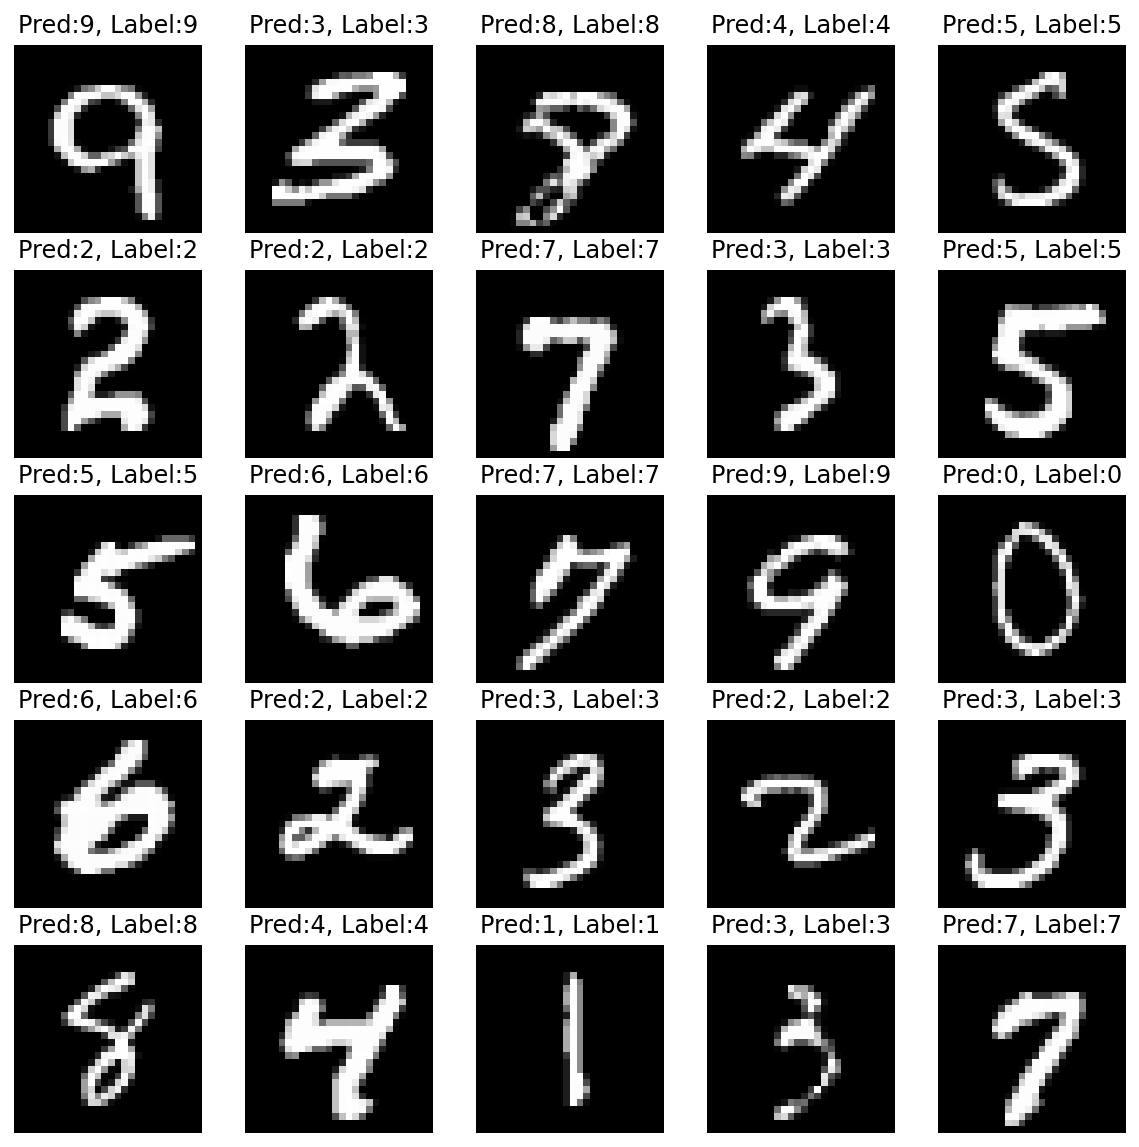

Done


In [ ]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets),n_sample,replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    R.eval() # to evaluation mode 
    y_pred = R.forward(test_x.view(-1,28,28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()
print ("Done")